In [61]:
matchId= '12007508'

In [62]:
import requests

params = {
    'matchId': matchId,
}

response = requests.get('https://www.sofascore.com/api/v1/event/'+ matchId +'/graph', params)

In [63]:
hcolor1='Red'
hcolor2='Yellow'

acolor1='Maroon'
acolor2= 'Green'

In [64]:
data= response.json()

In [65]:
Hgoals = [53]
Agoals = [27,36, 45]


In [66]:
momentum = data['graphPoints']

In [67]:
import pandas as pd
df= pd.DataFrame(momentum)

In [68]:
df.head()

,minute,value
0,1.0,-2
1,2.0,-16
2,3.0,11
3,4.0,-8
4,5.0,-18


In [69]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [70]:

# Path to football image
football_img_path = 'D:\Python Basics\Football Data Analytics\Sofascore\Teams Logo\Football.png'
hteam_logo= 'D:\Python Basics\Football Data Analytics\Sofascore\Teams Logo\eb.png'
ateam_logo= 'D:\Python Basics\Football Data Analytics\Sofascore\Teams Logo\mb.png'

In [71]:
positive_momentum = df['value'].apply(lambda x: x if x > 0 else 0)
negative_momentum = df['value'].apply(lambda x: abs(x) if x < 0 else 0)

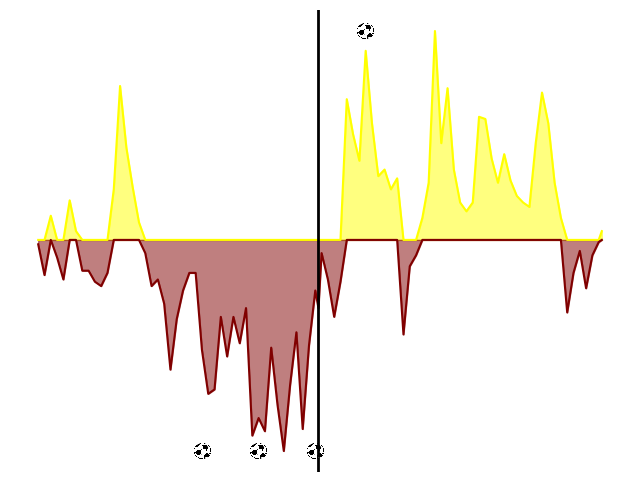

In [72]:
# Step 3: Create the Curve Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the positive and negative momentum curves
ax.plot(df['minute'], positive_momentum, color= hcolor2, alpha=1)
ax.plot(df['minute'], -negative_momentum, color=acolor1, alpha=1)

# Fill areas under the curves
ax.fill_between(df['minute'], positive_momentum, color= hcolor2, alpha=0.5)
ax.fill_between(df['minute'], -negative_momentum, color=acolor1, alpha=0.5)

# Add labels and title
ax.set_xlabel('Minute', fontsize=14)
ax.set_ylabel('Momentum', fontsize=14)

# Add a halftime line for reference
ax.axvline(45.5, color='black', linewidth=2)
# Hide grid
ax.grid(False)
plt.axis('off')
# Load the football image
football_img = plt.imread(football_img_path)
imagebox = OffsetImage(football_img, zoom=0.02)

# Add football image annotations
for goal_minute in Hgoals:
    ab = AnnotationBbox(imagebox, (goal_minute, positive_momentum.max() + 0.1), frameon=False)
    ax.add_artist(ab)

# Add football image annotations
for goal_minute in Agoals:
    bb = AnnotationBbox(imagebox, (goal_minute, -negative_momentum.max() + 0.1), frameon=False)
    ax.add_artist(bb)   


plt.savefig('momentum.png', bbox_inches='tight')
# Show plot
plt.show()